<a href="https://colab.research.google.com/github/dionmarshalll/dataquest-terserahmulah/blob/main/dataquest_terserahmu_lah_EDA_briefpreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importing necessary library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')

#### Downloading the dataset

In [ ]:
!pip install gdown
!gdown 1xQ5tDWTNGiwfKLH8C6iwkqf-hyk3dbt-
!gdown 1-823H1idpXG_tc7KPPyi8nUrQ588pah7

Downloading...
From: https://drive.google.com/uc?id=1xQ5tDWTNGiwfKLH8C6iwkqf-hyk3dbt-
To: /content/training_dataset.csv
100% 2.94M/2.94M [00:00<00:00, 38.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-823H1idpXG_tc7KPPyi8nUrQ588pah7
To: /content/validation_set.csv
100% 726k/726k [00:00<00:00, 63.9MB/s]


In [ ]:
df_train = pd.read_csv('training_dataset.csv')
df_validation = pd.read_csv('validation_set.csv')

#### Brief overlook at the dataset

In [ ]:
display(df_train.head())
print(df_train.shape)

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,hari_kontak_terakhir,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau,berlangganan_deposito
0,531036,63,sosial media specialis,menikah,Pendidikan Tinggi,no,yes,no,cellular,jul,fri,2,999,0,nonexistent,-1.7,94.215,-40.3,0.885,4991.6,Papua,1
1,999241,43,teknisi,menikah,Pendidikan Tinggi,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,Sulawesi,0
2,995002,29,sosial media specialis,lajang,Pendidikan Tinggi,no,yes,yes,cellular,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,Papua,0
3,932750,40,pekerja kasar,menikah,SMA,no,no,no,telephone,may,wed,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,Sumatera,1
4,684699,40,sosial media specialis,lajang,Pendidikan Tinggi,no,no,no,cellular,aug,wed,3,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,Bali,0


(22916, 22)


In [ ]:
display(df_validation.head())
print(df_validation.shape)

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,hari_kontak_terakhir,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau
0,445420,35,penyedia jasa,menikah,SMA,no,yes,yes,cellular,jul,mon,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,Jawa
1,585604,52,teknisi,lajang,Diploma,unknown,no,no,telephone,may,thu,4,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,Papua
2,888824,37,pekerja kasar,menikah,SMP,unknown,yes,no,telephone,may,wed,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,Bali
3,816820,51,pengangguran,menikah,Diploma,no,no,no,telephone,may,tue,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,Sumatera
4,542716,45,teknisi,cerai,SMA,no,yes,no,cellular,may,thu,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,Sumatera


(5729, 21)


In [ ]:
months = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}
df_train = df_train.replace({'bulan_kontak_terakhir': months})
df_validation = df_validation.replace({'bulan_kontak_terakhir': months})

In [ ]:
df_train.bulan_kontak_terakhir.value_counts()

,count
bulan_kontak_terakhir,
5,7611
7,4062
8,3407
6,2957
11,2249
4,1504
10,421
9,317
3,286


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22916 entries, 0 to 22915
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_number               22916 non-null  int64  
 1   usia                          22916 non-null  int64  
 2   pekerjaan                     22916 non-null  object 
 3   status_perkawinan             22916 non-null  object 
 4   pendidikan                    22916 non-null  object 
 5   gagal_bayar_sebelumnya        22916 non-null  object 
 6   pinjaman_rumah                22916 non-null  object 
 7   pinjaman_pribadi              22916 non-null  object 
 8   jenis_kontak                  22916 non-null  object 
 9   bulan_kontak_terakhir         22916 non-null  int64  
 10  hari_kontak_terakhir          22916 non-null  object 
 11  jumlah_kontak_kampanye_ini    22916 non-null  int64  
 12  hari_sejak_kontak_sebelumnya  22916 non-null  int64  
 13  j

In [ ]:
df_train.duplicated().sum()

np.int64(0)

#### Distribution of each features

##### Lets take a look at the target first

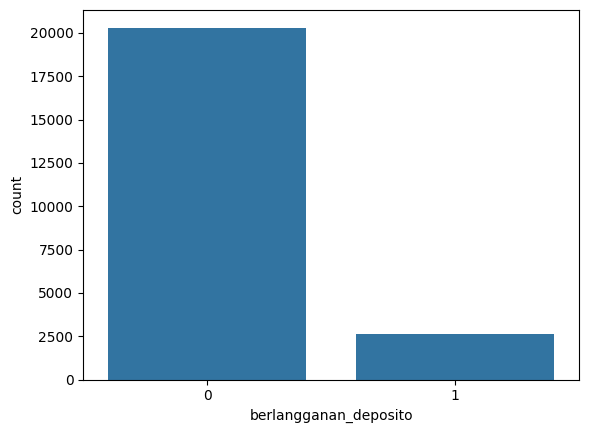

In [ ]:
sns.countplot(x=df_train['berlangganan_deposito'])
plt.show()

##### Untuk fitur objek/katagorikal

In [ ]:
# obj_cols = df_train.select_dtypes(include='object')
# n = obj_cols.shape[1]

# plt.figure(figsize=(15, n*10))
# for i, col in enumerate(obj_cols):
#   plt.subplot(n*2, 2, i*2+1)
#   sns.countplot(x=df_train[col])
#   plt.xticks(rotation=40)
#   plt.title(f'Distribusi dari fitur {col}')

#   plt.subplot(n*2, 2, i*2+2)
#   sns.countplot(data=df_train, x=col, hue='berlangganan_deposito')
#   plt.xticks(rotation=40)
#   plt.title(f'Distribusi dengan pengaruh target')

# plt.tight_layout()
# plt.show()

##### Untuk fitur numerikal

In [ ]:
# num_cols = df_train.select_dtypes(include='number')

# plt.figure(figsize=(15, n*10))
# for i, col in enumerate(num_cols):
#   plt.subplot(n*2, 2, i*2+1)
#   sns.histplot(data=df_train, x=col)
#   plt.xticks(rotation=40)
#   plt.title(f'Distribusi dari fitur {col}')

#   plt.subplot(n*2, 2, i*2+2)
#   sns.histplot(data=df_train, x=col, hue='berlangganan_deposito', multiple='stack')
#   plt.xticks(rotation=40)
#   plt.title(f'Distribusi dengan pengaruh target')

# plt.tight_layout()
# plt.show()

##### Deep analysis for some features that might be needed.

###### feature `gagal_bayar_sebelumnya`

<Axes: xlabel='gagal_bayar_sebelumnya', ylabel='count'>

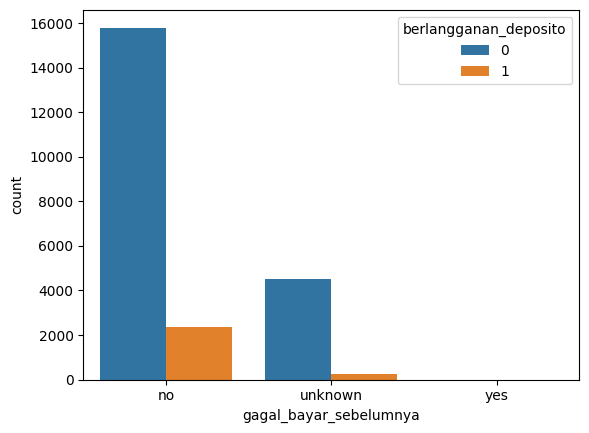

In [ ]:
sns.countplot(data=df_train, x='gagal_bayar_sebelumnya', hue='berlangganan_deposito')

In [ ]:
df_train.loc[df_train['gagal_bayar_sebelumnya']=='yes']

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,hari_kontak_terakhir,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau,berlangganan_deposito
14847,530105,48,teknisi,menikah,Diploma,yes,no,no,cellular,8,tue,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,Kalimantan,0
22352,872268,48,teknisi,menikah,Diploma,yes,yes,no,cellular,8,tue,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,Kalimantan,0


gagal_bayar_sebelumnya: unknown


,count
pendidikan,
Tidak Tamat SD,926
SMA,900
SMP,881
Pendidikan Tinggi,787
SD,489
Diploma,446
unknown,311
TIDAK SEKOLAH,5


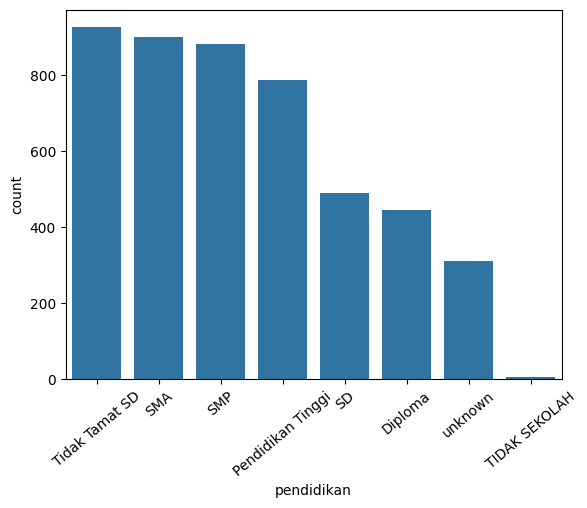


gagal_bayar_sebelumnya: yes


,count
pendidikan,
Diploma,2


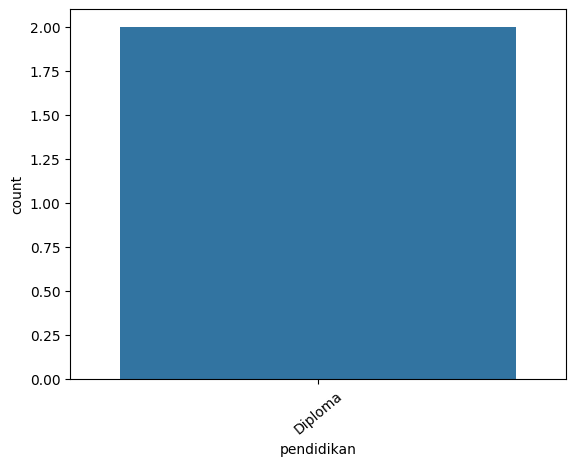


gagal_bayar_sebelumnya: no


,count
pendidikan,
Pendidikan Tinggi,5912
SMA,4503
SMP,2456
Diploma,2433
Tidak Tamat SD,1358
SD,819
unknown,681
TIDAK SEKOLAH,7


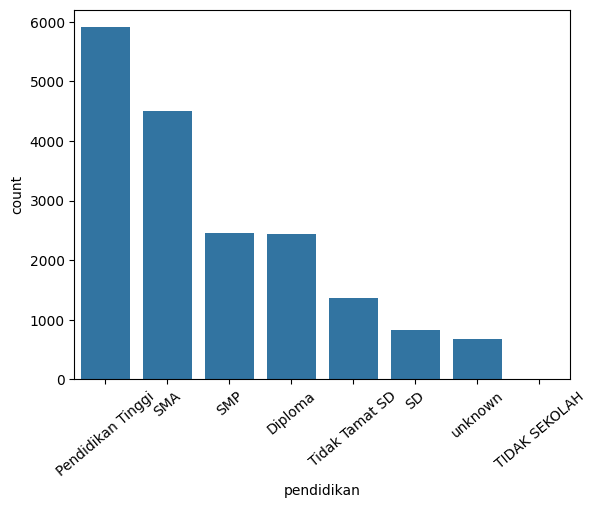

In [ ]:
# hubungannya dengan pendidikan
print('gagal_bayar_sebelumnya: unknown')
display(df_train.loc[df_train['gagal_bayar_sebelumnya']=='unknown', ['pendidikan']].value_counts())
sns.barplot(data=df_train.loc[df_train['gagal_bayar_sebelumnya']=='unknown', ['pendidikan']].value_counts().reset_index(), x='pendidikan', y='count')
plt.xticks(rotation=40)
plt.show()

print('\ngagal_bayar_sebelumnya: yes')
display(df_train.loc[df_train['gagal_bayar_sebelumnya']=='yes', ['pendidikan']].value_counts())
sns.barplot(data=df_train.loc[df_train['gagal_bayar_sebelumnya']=='yes', ['pendidikan']].value_counts().reset_index(), x='pendidikan', y='count')
plt.xticks(rotation=40)
plt.show()

print('\ngagal_bayar_sebelumnya: no')
display(df_train.loc[df_train['gagal_bayar_sebelumnya']=='no', ['pendidikan']].value_counts())
sns.barplot(data=df_train.loc[df_train['gagal_bayar_sebelumnya']=='no', ['pendidikan']].value_counts().reset_index(), x='pendidikan', y='count')
plt.xticks(rotation=40)
plt.show()

gagal_bayar_sebelumnya: unknown


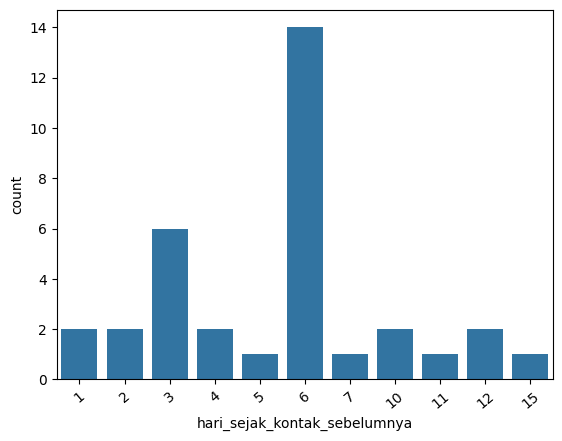


gagal_bayar_sebelumnya: yes


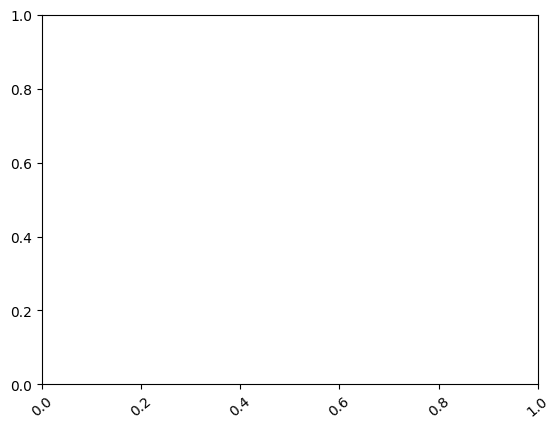


gagal_bayar_sebelumnya: no


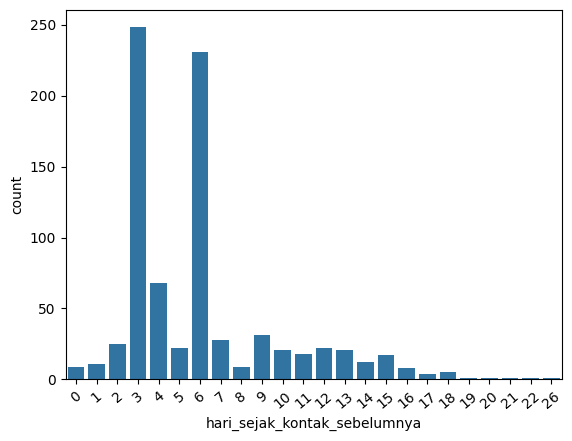

In [ ]:
# hubungannya dengan hari_sejak_kontak_sebelumnya
feat = 'hari_sejak_kontak_sebelumnya'

print('gagal_bayar_sebelumnya: unknown')
# display(df_train.loc[df_train['gagal_bayar_sebelumnya']=='unknown', [feat]].value_counts())
sns.barplot(data=df_train.loc[(df_train['gagal_bayar_sebelumnya']=='unknown') & (df_train['hari_sejak_kontak_sebelumnya']!=999), [feat]].value_counts().reset_index(), x=feat, y='count')
plt.xticks(rotation=40)
plt.show()

print('\ngagal_bayar_sebelumnya: yes')
# display(df_train.loc[df_train['gagal_bayar_sebelumnya']=='yes', [feat]].value_counts())
sns.barplot(data=df_train.loc[(df_train['gagal_bayar_sebelumnya']=='yes') & (df_train['hari_sejak_kontak_sebelumnya']!=999), [feat]].value_counts().reset_index(), x=feat, y='count')
plt.xticks(rotation=40)
plt.show()

print('\ngagal_bayar_sebelumnya: no')
# display(df_train.loc[df_train['gagal_bayar_sebelumnya']=='no', [feat]].value_counts())
sns.barplot(data=df_train.loc[(df_train['gagal_bayar_sebelumnya']=='no') & (df_train['hari_sejak_kontak_sebelumnya']!=999), [feat]].value_counts().reset_index(), x=feat, y='count')
plt.xticks(rotation=40)
plt.show()

Can be seen from the feature `gagal_bayar_sebelumnya` with the value "no", theres more of a record with the value from `hari_sejak_kontak_sebelumny` more than one week, even tho theres more in it with value days under one week.

gagal_bayar_sebelumnya: unknown


,count
tingkat_variasi_pekerjaan,
1.4,2405
1.1,1347
-1.8,696
-0.1,243
-2.9,23
-1.7,11
-3.4,9
-1.1,7
-3.0,4


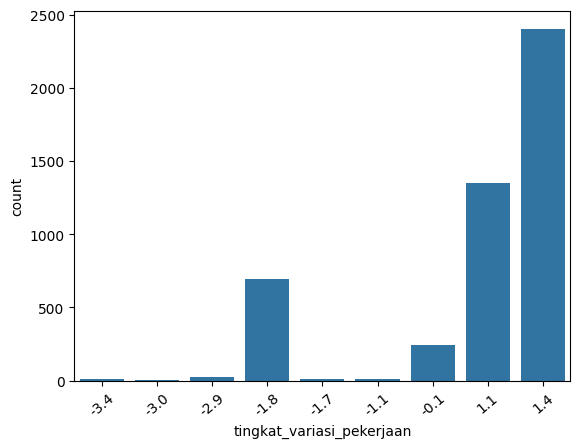


gagal_bayar_sebelumnya: yes


,count
tingkat_variasi_pekerjaan,
1.4,2


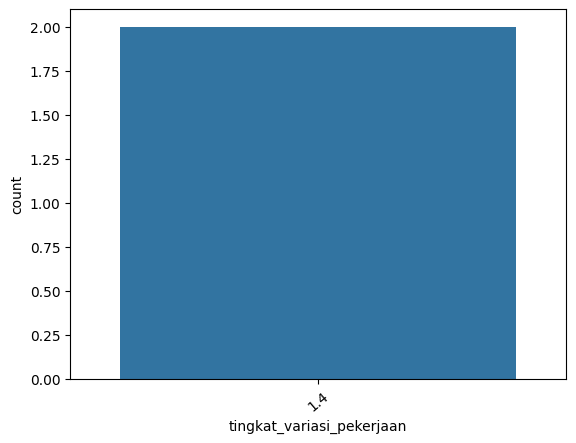


gagal_bayar_sebelumnya: no


,count
tingkat_variasi_pekerjaan,
1.4,6608
-1.8,4361
1.1,2997
-0.1,1776
-2.9,935
-3.4,604
-1.7,442
-1.1,348
-3.0,91


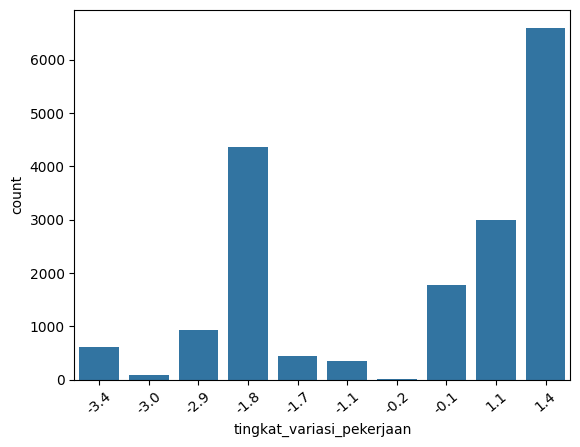

In [ ]:
# hubungannya dengan tingkat_variasi_pekerjaan
feat = 'tingkat_variasi_pekerjaan'

print('gagal_bayar_sebelumnya: unknown')
display(df_train.loc[df_train['gagal_bayar_sebelumnya']=='unknown', [feat]].value_counts())
sns.barplot(data=df_train.loc[(df_train['gagal_bayar_sebelumnya']=='unknown'), [feat]].value_counts().reset_index(), x=feat, y='count')
plt.xticks(rotation=40)
plt.show()

print('\ngagal_bayar_sebelumnya: yes')
display(df_train.loc[df_train['gagal_bayar_sebelumnya']=='yes', [feat]].value_counts())
sns.barplot(data=df_train.loc[(df_train['gagal_bayar_sebelumnya']=='yes'), [feat]].value_counts().reset_index(), x=feat, y='count')
plt.xticks(rotation=40)
plt.show()

print('\ngagal_bayar_sebelumnya: no')
display(df_train.loc[df_train['gagal_bayar_sebelumnya']=='no', [feat]].value_counts())
sns.barplot(data=df_train.loc[(df_train['gagal_bayar_sebelumnya']=='no'), [feat]].value_counts().reset_index(), x=feat, y='count')
plt.xticks(rotation=40)
plt.show()

gagal_bayar_sebelumnya: unknown


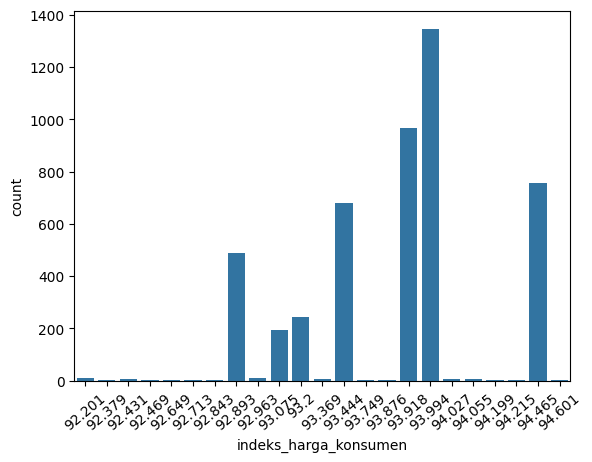


gagal_bayar_sebelumnya: yes


,count
indeks_harga_konsumen,
93.444,2



gagal_bayar_sebelumnya: no


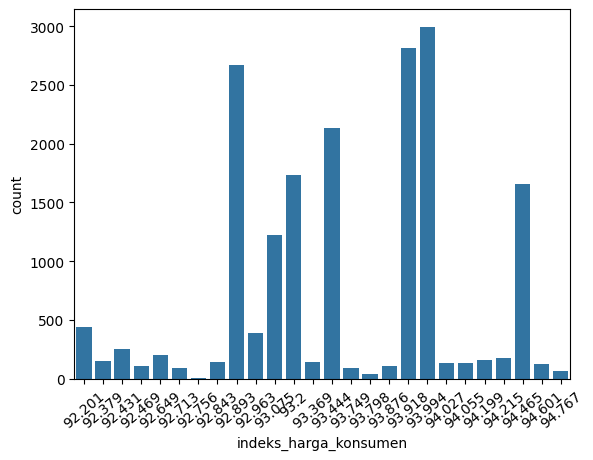

In [ ]:
# hubungannya dengan indeks_harga_konsumen
feat = 'indeks_harga_konsumen'

print('gagal_bayar_sebelumnya: unknown')
# display(df_train.loc[df_train['gagal_bayar_sebelumnya']=='unknown', [feat]].value_counts())
sns.barplot(data=df_train.loc[(df_train['gagal_bayar_sebelumnya']=='unknown'), [feat]].value_counts().reset_index(), x=feat, y='count')
plt.xticks(rotation=40)
plt.show()

print('\ngagal_bayar_sebelumnya: yes')
display(df_train.loc[df_train['gagal_bayar_sebelumnya']=='yes', [feat]].value_counts())

print('\ngagal_bayar_sebelumnya: no')
# display(df_train.loc[df_train['gagal_bayar_sebelumnya']=='no', [feat]].value_counts())
sns.barplot(data=df_train.loc[(df_train['gagal_bayar_sebelumnya']=='no'), [feat]].value_counts().reset_index(), x=feat, y='count')
plt.xticks(rotation=40)
plt.show()

gagal_bayar_sebelumnya: unknown


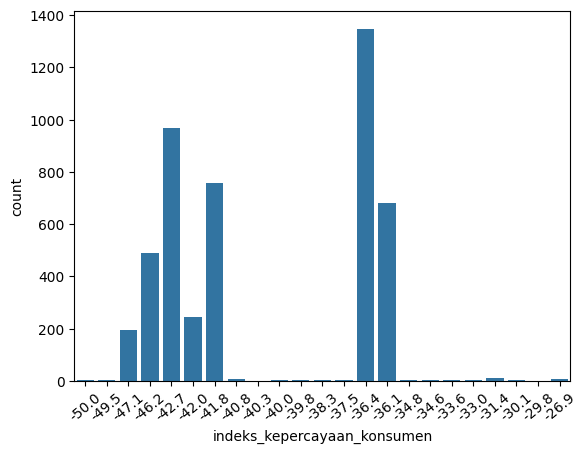


gagal_bayar_sebelumnya: yes


,count
indeks_kepercayaan_konsumen,
-36.1,2



gagal_bayar_sebelumnya: no


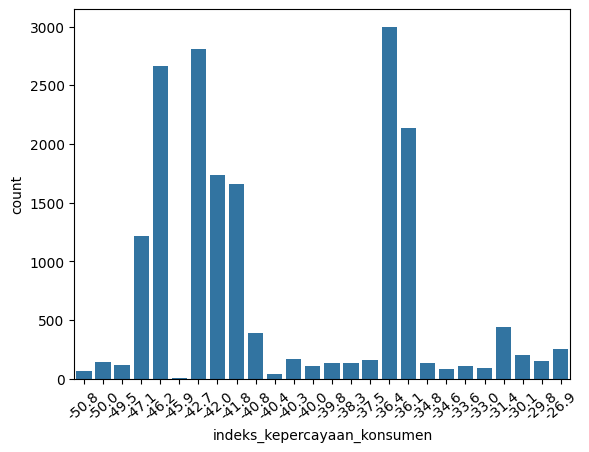

In [ ]:
# hubungannya dengan indeks_kepercayaan_konsumen
feat = 'indeks_kepercayaan_konsumen'

print('gagal_bayar_sebelumnya: unknown')
# display(df_train.loc[df_train['gagal_bayar_sebelumnya']=='unknown', [feat]].value_counts())
sns.barplot(data=df_train.loc[(df_train['gagal_bayar_sebelumnya']=='unknown'), [feat]].value_counts().reset_index(), x=feat, y='count')
plt.xticks(rotation=40)
plt.show()

print('\ngagal_bayar_sebelumnya: yes')
display(df_train.loc[df_train['gagal_bayar_sebelumnya']=='yes', [feat]].value_counts())

print('\ngagal_bayar_sebelumnya: no')
# display(df_train.loc[df_train['gagal_bayar_sebelumnya']=='no', [feat]].value_counts())
sns.barplot(data=df_train.loc[(df_train['gagal_bayar_sebelumnya']=='no'), [feat]].value_counts().reset_index(), x=feat, y='count')
plt.xticks(rotation=40)
plt.show()

gagal_bayar_sebelumnya: unknown


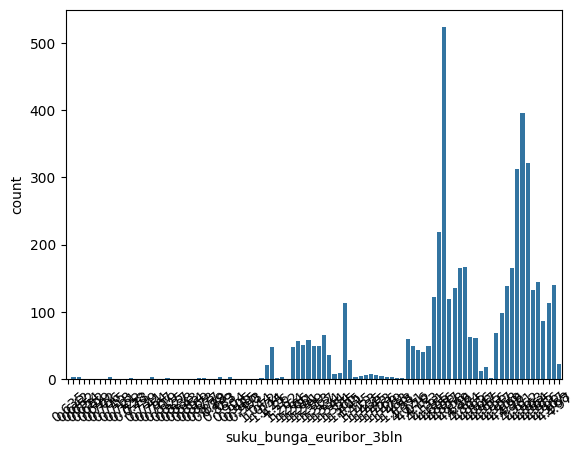

min: 0.635 | max: 4.97

gagal_bayar_sebelumnya: yes


,count
suku_bunga_euribor_3bln,
4.963,2



gagal_bayar_sebelumnya: no


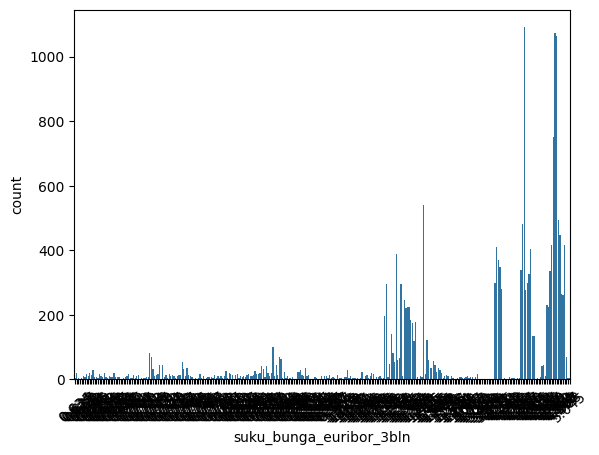

min: 0.634 | max: 5.045


In [ ]:
# hubungannya dengan suku_bunga_euribor_3bln
feat = 'suku_bunga_euribor_3bln'

print('gagal_bayar_sebelumnya: unknown')
# display(df_train.loc[df_train['gagal_bayar_sebelumnya']=='unknown', [feat]].value_counts())
sns.barplot(data=df_train.loc[(df_train['gagal_bayar_sebelumnya']=='unknown'), [feat]].value_counts().reset_index(), x=feat, y='count')
plt.xticks(rotation=40)
plt.show()

print('min:', df_train.loc[df_train['gagal_bayar_sebelumnya']=='unknown', [feat]].min()[0], end=' | ')
print('max:', df_train.loc[df_train['gagal_bayar_sebelumnya']=='unknown', [feat]].max()[0])

print('\ngagal_bayar_sebelumnya: yes')
display(df_train.loc[df_train['gagal_bayar_sebelumnya']=='yes', [feat]].value_counts())

print('\ngagal_bayar_sebelumnya: no')
# display(df_train.loc[df_train['gagal_bayar_sebelumnya']=='no', [feat]].value_counts())
sns.barplot(data=df_train.loc[(df_train['gagal_bayar_sebelumnya']=='no'), [feat]].value_counts().reset_index(), x=feat, y='count')
plt.xticks(rotation=40)
plt.show()

print('min:', df_train.loc[df_train['gagal_bayar_sebelumnya']=='no', [feat]].min()[0], end=' | ')
print('max:', df_train.loc[df_train['gagal_bayar_sebelumnya']=='no', [feat]].max()[0])

###### feature `bulan_kontak_terakhir`

<Axes: xlabel='bulan_kontak_terakhir', ylabel='count'>

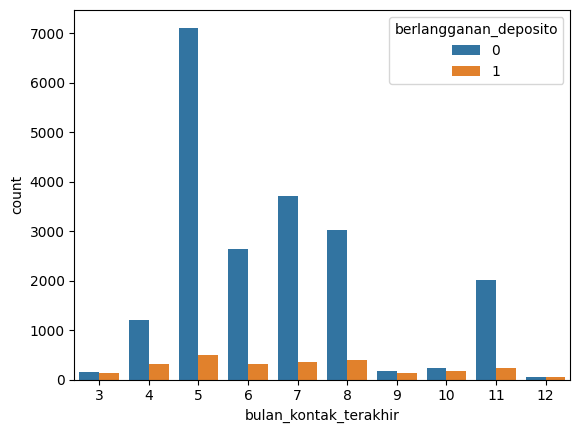

In [ ]:
sns.countplot(data=df_train, x='bulan_kontak_terakhir', hue='berlangganan_deposito')

In [ ]:
# months_big_count = ['may', 'jul', 'aug', 'jun']
# for month in months_big_count:
#   print('=======================================')
#   print(f'month: {month} | without continuing deposito', df_train.loc[(df_train['bulan_kontak_terakhir']==month) & (df_train['berlangganan_deposito']==0), ['hari_sejak_kontak_sebelumnya']].value_counts()[:3])
#   print(f'month: {month} | with continuing deposito', df_train.loc[(df_train['bulan_kontak_terakhir']==month) & (df_train['berlangganan_deposito']==1), ['hari_sejak_kontak_sebelumnya']].value_counts()[:3])
#   print('========================================\n')

###### feature `usia`

<Axes: xlabel='usia', ylabel='Count'>

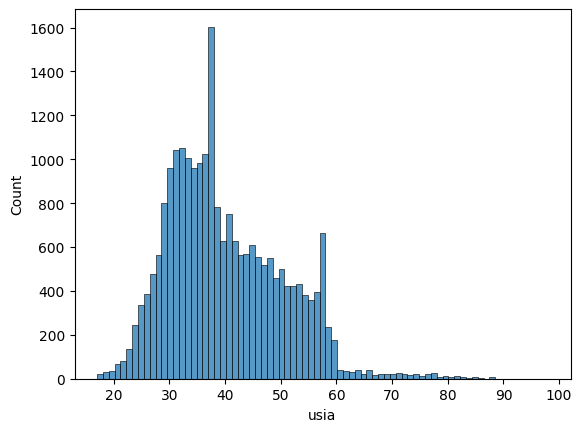

In [ ]:
sns.histplot(data=df_train, x='usia')

In [ ]:
print('di atas 60:', df_train.loc[df_train['usia']>60].shape[0])
print('total:', df_train.shape[0])

di atas 60: 523
total: 22916


<Axes: xlabel='usia', ylabel='Count'>

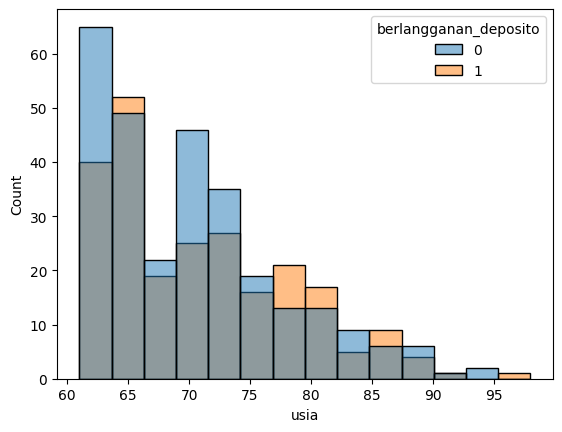

In [ ]:
sns.histplot(data=df_train.loc[df_train['usia']>60], x='usia', hue='berlangganan_deposito')

<Axes: xlabel='usia', ylabel='Count'>

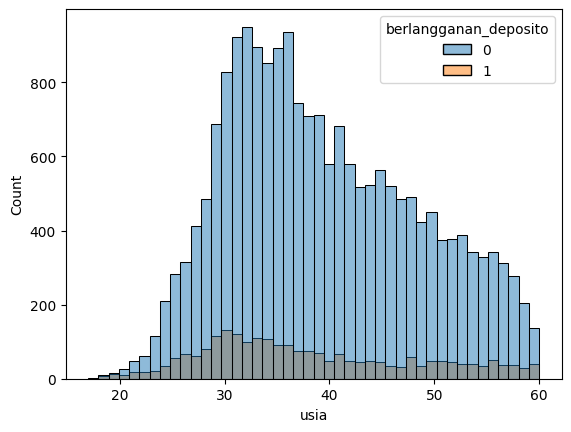

In [ ]:
sns.histplot(data=df_train.loc[df_train['usia']<=60], x='usia', hue='berlangganan_deposito')

###### feature `jumlah_kontak_kampanye_ini`

<Axes: xlabel='jumlah_kontak_kampanye_ini', ylabel='count'>

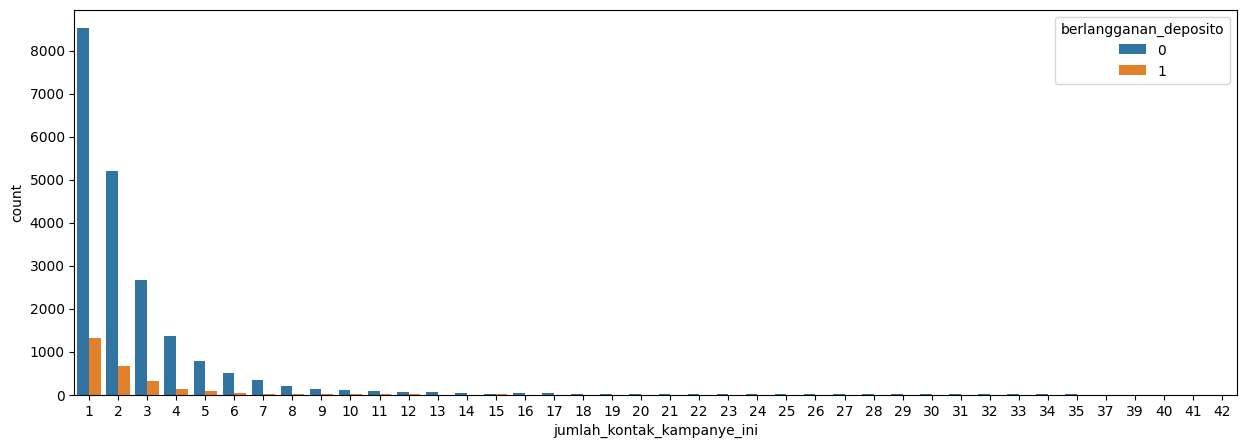

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df_train, x='jumlah_kontak_kampanye_ini', hue='berlangganan_deposito')

In [ ]:
df_train['jumlah_kontak_kampanye_ini'].corr(df_train['jumlah_kontak_sebelumnya'])

np.float64(-0.07403799006354352)

In [ ]:
for jumlah_kontak in sorted(df_train['jumlah_kontak_kampanye_ini'].unique()):
  jumlah_tidak_lanjut = df_train.loc[(df_train['jumlah_kontak_kampanye_ini']==jumlah_kontak) & (df_train['berlangganan_deposito']==0)].shape[0]
  jumlah_lanjut = df_train.loc[(df_train['jumlah_kontak_kampanye_ini']==jumlah_kontak) & (df_train['berlangganan_deposito']==1)].shape[0]

  if jumlah_lanjut == 0:
    print(f'Pada jumlah_kontak: {jumlah_kontak} jumlah yang lanjut tidak ada - skip')
    print(f'Jumlah yang tidak lanjut: {jumlah_tidak_lanjut}\n')
    continue

  print(f'Pada jumlah_kontak: {jumlah_kontak}, rasio antara yang berlangganan dan yang tidak lanjut: ', end='')
  print(f'{(jumlah_tidak_lanjut/jumlah_lanjut):.2f} : 1')
  print(f'Persenan yang tidak lanjut: {(jumlah_tidak_lanjut/(jumlah_lanjut+jumlah_tidak_lanjut))*100:.3f}%\n')

Pada jumlah_kontak: 1, rasio antara yang berlangganan dan yang tidak lanjut: 6.47 : 1
Persenan yang tidak lanjut: 86.612%

Pada jumlah_kontak: 2, rasio antara yang berlangganan dan yang tidak lanjut: 7.78 : 1
Persenan yang tidak lanjut: 88.607%

Pada jumlah_kontak: 3, rasio antara yang berlangganan dan yang tidak lanjut: 8.37 : 1
Persenan yang tidak lanjut: 89.331%

Pada jumlah_kontak: 4, rasio antara yang berlangganan dan yang tidak lanjut: 9.76 : 1
Persenan yang tidak lanjut: 90.702%

Pada jumlah_kontak: 5, rasio antara yang berlangganan dan yang tidak lanjut: 10.77 : 1
Persenan yang tidak lanjut: 91.502%

Pada jumlah_kontak: 6, rasio antara yang berlangganan dan yang tidak lanjut: 11.95 : 1
Persenan yang tidak lanjut: 92.279%

Pada jumlah_kontak: 7, rasio antara yang berlangganan dan yang tidak lanjut: 17.10 : 1
Persenan yang tidak lanjut: 94.475%

Pada jumlah_kontak: 8, rasio antara yang berlangganan dan yang tidak lanjut: 24.88 : 1
Persenan yang tidak lanjut: 96.135%

Pada jumlah_

###### feature `hari_sejak_kontak_sebelumnya`

<Axes: xlabel='hari_sejak_kontak_sebelumnya', ylabel='count'>

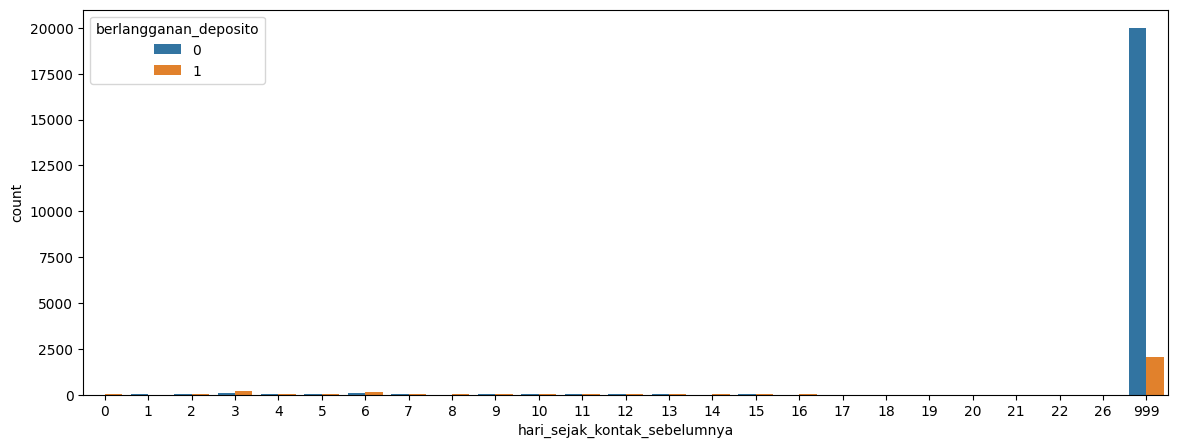

In [ ]:
plt.figure(figsize=(14, 5))
sns.countplot(data=df_train, x='hari_sejak_kontak_sebelumnya', hue='berlangganan_deposito')

In [ ]:
(df_train['hari_sejak_kontak_sebelumnya']!=999).sum(), f'total: {df_train.shape[0]}'

(np.int64(849), 'total: 22916')

In [ ]:
feat = 'jumlah_kontak_kampanye_ini'
display(df_train.loc[(df_train['hari_sejak_kontak_sebelumnya']==999), [feat]].value_counts()[:5])
display(df_train.loc[(df_train['hari_sejak_kontak_sebelumnya']!=999), [feat]].value_counts()[:5])

,count
jumlah_kontak_kampanye_ini,
1,9392
2,5633
3,2900
4,1464
5,843


,count
jumlah_kontak_kampanye_ini,
1,453
2,239
3,90
4,31
5,16


###### whats really the features `indeks_harga_konsumen` dan `indeks_kepercayaan_konsumen` in this dataset

by the definition from the guidebooks and in my understading (by this, i dont know whats index in this context):
- `indeks_harga_konsumen` are the indices for the price for each consumer (each people that are a target for the campaign) for the related month
- `indeks_kepercayaan_konsumen` are the indices for level of trust each consumer has for the related month

by the definition from the ChatGPT with the context given:
- `indeks_harga_konsumen`
- `indeks_kepercayaan_konsumen`

In [ ]:
# # finding out if both features have high correlation or not
# print(df_train['indeks_harga_konsumen'].corr(df_train['indeks_kepercayaan_konsumen']))

# sns.scatterplot(data=df_train, x='indeks_harga_konsumen', y='indeks_kepercayaan_konsumen')
# plt.show()

In [ ]:
import numpy as np

temp_df = df_train.groupby(by=['indeks_harga_konsumen', 'indeks_kepercayaan_konsumen'])[['indeks_harga_konsumen', 'indeks_kepercayaan_konsumen']].mean().reset_index(drop=True)
df_train['indeks_harga_konsumen_x_berlangganan_deposito_count'] = np.nan
df_validation['indeks_harga_konsumen_x_berlangganan_deposito_count'] = np.nan

for indeks in temp_df['indeks_harga_konsumen'].unique():
  indeks = round(indeks, 3)
  counts = df_train.loc[round(df_train['indeks_harga_konsumen'], 3)==indeks, 'berlangganan_deposito'].value_counts()
  if counts[0]>counts[1]:
    df_train.loc[round(df_train['indeks_harga_konsumen'], 3)==indeks, 'indeks_harga_konsumen_x_berlangganan_deposito_count'] = 0
    df_validation.loc[round(df_validation['indeks_harga_konsumen'], 3)==indeks, 'indeks_harga_konsumen_x_berlangganan_deposito_count'] = 0
  elif counts[1]>counts[0]:
    df_train.loc[round(df_train['indeks_harga_konsumen'], 3)==indeks, 'indeks_harga_konsumen_x_berlangganan_deposito_count'] = 1
    df_validation.loc[round(df_validation['indeks_harga_konsumen'], 3)==indeks, 'indeks_harga_konsumen_x_berlangganan_deposito_count'] = 1

df_train['indeks_harga_konsumen_x_berlangganan_deposito_count'] = df_train['indeks_harga_konsumen_x_berlangganan_deposito_count'].astype(int)
df_validation['indeks_harga_konsumen_x_berlangganan_deposito_count'] = df_validation['indeks_harga_konsumen_x_berlangganan_deposito_count'].astype(int)
df_train['indeks_harga_konsumen_x_berlangganan_deposito_count'].value_counts()

,count
indeks_harga_konsumen_x_berlangganan_deposito_count,
0,22220
1,696


0.0463117419020485


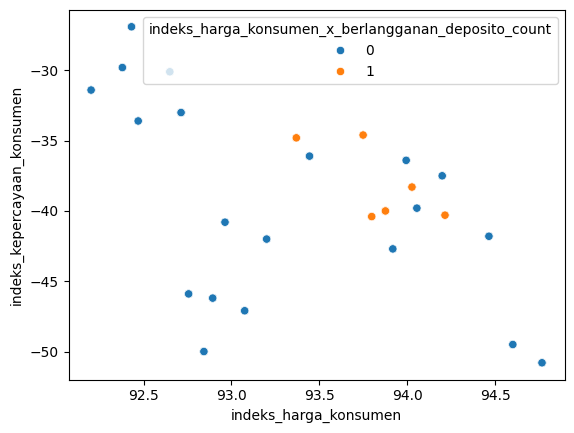

In [ ]:
print(df_train['indeks_harga_konsumen'].corr(df_train['indeks_kepercayaan_konsumen']))

sns.scatterplot(data=df_train, x='indeks_harga_konsumen', y='indeks_kepercayaan_konsumen', hue='indeks_harga_konsumen_x_berlangganan_deposito_count')
plt.show()

In [ ]:
# menggunakan fitur hari_sejak_kontak_sebelumnya untuk mencari perbandingan antara indeks_harga_konsumen dengan target berlangganan_deposito
feat_to_compare = 'hari_sejak_kontak_sebelumnya'
df_viz_ = df_train.loc[df_train[feat_to_compare]!=999].groupby(by=[feat_to_compare, 'berlangganan_deposito'])[['indeks_harga_konsumen']].mean()
df_viz = df_train.groupby(by=[feat_to_compare, 'berlangganan_deposito'])[['indeks_harga_konsumen']].mean()
df_viz_ = df_viz_.reset_index()
df_viz = df_viz.reset_index()
# df_viz_.head(10)

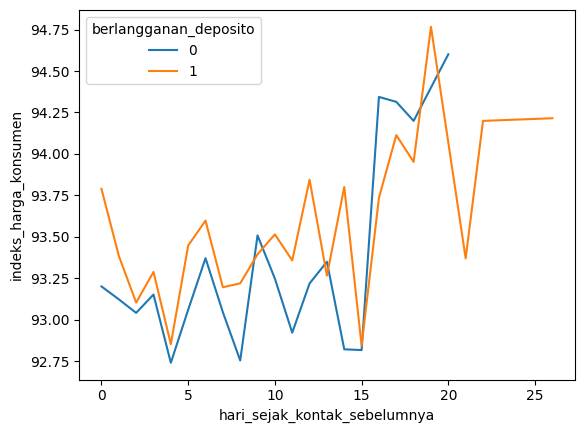

In [ ]:
# visualisasi untuk fitur indeks_harga_konsumen
sns.lineplot(data=df_viz_, x=feat_to_compare, y='indeks_harga_konsumen', hue='berlangganan_deposito')
plt.show()

In [ ]:
# membuat fitur baru sebagai melihat hubungan dari berlangganan_deposito dengan indeks_harga_konsumen dengan bantuan hari_sejak_kontak_sebelumnya
df_train['ind_bd_x_hri_kontak_sbelum'] = np.nan
df_validation['ind_bd_x_hri_kontak_sbelum'] = np.nan
for hari in df_viz['hari_sejak_kontak_sebelumnya'].unique():
  if df_viz.loc[(df_viz['hari_sejak_kontak_sebelumnya']==hari) & (df_viz['berlangganan_deposito']==0), 'indeks_harga_konsumen'].shape[0]==0:
    df_train.loc[(df_train['hari_sejak_kontak_sebelumnya']==hari), 'ind_bd_x_hri_kontak_sbelum'] = 1
    df_validation.loc[(df_validation['hari_sejak_kontak_sebelumnya']==hari), 'ind_bd_x_hri_kontak_sbelum'] = 1
  elif df_viz.loc[(df_viz['hari_sejak_kontak_sebelumnya']==hari) & (df_viz['berlangganan_deposito']==1), 'indeks_harga_konsumen'].shape[0]==0:
    df_train.loc[(df_train['hari_sejak_kontak_sebelumnya']==hari), 'ind_bd_x_hri_kontak_sbelum'] = 0
    df_validation.loc[(df_validation['hari_sejak_kontak_sebelumnya']==hari), 'ind_bd_x_hri_kontak_sbelum'] = 0

  else:
    mean_indeks_0 = df_viz.loc[(df_viz['hari_sejak_kontak_sebelumnya']==hari) & (df_viz['berlangganan_deposito']==0), 'indeks_harga_konsumen'].values[0]
    mean_indeks_1 = df_viz.loc[(df_viz['hari_sejak_kontak_sebelumnya']==hari) & (df_viz['berlangganan_deposito']==1), 'indeks_harga_konsumen'].values[0]
    if mean_indeks_0>mean_indeks_1:
      df_train.loc[(df_train['hari_sejak_kontak_sebelumnya']==hari), 'ind_bd_x_hri_kontak_sbelum'] = 0
      df_validation.loc[(df_validation['hari_sejak_kontak_sebelumnya']==hari), 'ind_bd_x_hri_kontak_sbelum'] = 0
    elif mean_indeks_1>mean_indeks_0:
      df_train.loc[(df_train['hari_sejak_kontak_sebelumnya']==hari), 'ind_bd_x_hri_kontak_sbelum'] = 1
      df_validation.loc[(df_validation['hari_sejak_kontak_sebelumnya']==hari), 'ind_bd_x_hri_kontak_sbelum'] = 1

df_train['ind_bd_x_hri_kontak_sbelum'] = df_train['ind_bd_x_hri_kontak_sbelum'].astype(int)
df_validation['ind_bd_x_hri_kontak_sbelum'] = df_validation['ind_bd_x_hri_kontak_sbelum'].astype(int)
df_train['ind_bd_x_hri_kontak_sbelum'].value_counts()

,count
ind_bd_x_hri_kontak_sbelum,
0,22137
1,779


In [ ]:
# menggunakan fitur bulan_kontak_terakhir untuk mencari perbandingan antara indeks_harga_konsumen dengan target berlangganan_deposito
feat_to_compare = 'bulan_kontak_terakhir'
df_viz = df_train.groupby(by=[feat_to_compare, 'berlangganan_deposito'])[['indeks_harga_konsumen']].mean()
df_viz = df_viz.reset_index()
# df_viz.head(10)

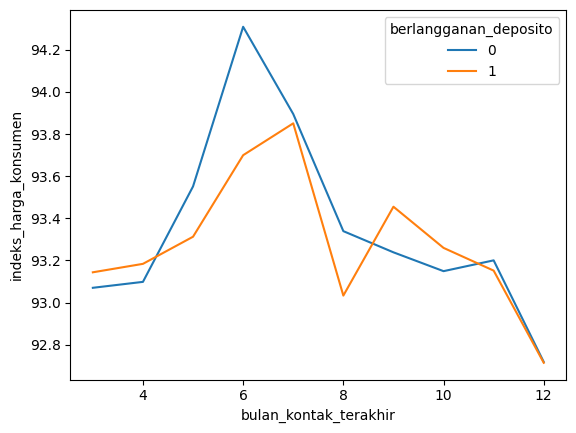

In [ ]:
# visualisasi untuk fitur indeks_harga_konsumen
sns.lineplot(data=df_viz, x=feat_to_compare, y='indeks_harga_konsumen', hue='berlangganan_deposito')
plt.show()

In [ ]:
# membuat fitur baru sebagai melihat hubungan dari berlangganan_deposito dengan indeks_harga_konsumen dengan bantuan bulan_kontak_terakhir
df_train['ind_bd_x_bulan_kontak_trakhir'] = np.nan
df_validation['ind_bd_x_bulan_kontak_trakhir'] = np.nan
for bulan in df_viz['bulan_kontak_terakhir'].unique():
  if df_viz.loc[(df_viz['bulan_kontak_terakhir']==bulan) & (df_viz['berlangganan_deposito']==0), 'indeks_harga_konsumen'].shape[0]==0:
    df_train.loc[(df_train['bulan_kontak_terakhir']==bulan), 'ind_bd_x_hri_kontak_sbelum'] = 1
    df_validation.loc[(df_validation['bulan_kontak_terakhir']==bulan), 'ind_bd_x_hri_kontak_sbelum'] = 1
  elif df_viz.loc[(df_viz['bulan_kontak_terakhir']==bulan) & (df_viz['berlangganan_deposito']==1), 'indeks_harga_konsumen'].shape[0]==0:
    df_train.loc[(df_train['bulan_kontak_terakhir']==bulan), 'ind_bd_x_hri_kontak_sbelum'] = 0
    df_validation.loc[(df_validation['bulan_kontak_terakhir']==bulan), 'ind_bd_x_hri_kontak_sbelum'] = 0

  else:
    mean_indeks_0 = df_viz.loc[(df_viz['bulan_kontak_terakhir']==bulan) & (df_viz['berlangganan_deposito']==0), 'indeks_harga_konsumen'].values[0]
    mean_indeks_1 = df_viz.loc[(df_viz['bulan_kontak_terakhir']==bulan) & (df_viz['berlangganan_deposito']==1), 'indeks_harga_konsumen'].values[0]
    if mean_indeks_0>mean_indeks_1:
      df_train.loc[(df_train['bulan_kontak_terakhir']==bulan), 'ind_bd_x_bulan_kontak_trakhir'] = 0
      df_validation.loc[(df_validation['bulan_kontak_terakhir']==bulan), 'ind_bd_x_bulan_kontak_trakhir'] = 0
    elif mean_indeks_1>mean_indeks_0:
      df_train.loc[(df_train['bulan_kontak_terakhir']==bulan), 'ind_bd_x_bulan_kontak_trakhir'] = 1
      df_validation.loc[(df_validation['bulan_kontak_terakhir']==bulan), 'ind_bd_x_bulan_kontak_trakhir'] = 1

df_train['ind_bd_x_bulan_kontak_trakhir'] = df_train['ind_bd_x_bulan_kontak_trakhir'].astype(int)
df_validation['ind_bd_x_bulan_kontak_trakhir'] = df_validation['ind_bd_x_bulan_kontak_trakhir'].astype(int)
df_train['ind_bd_x_bulan_kontak_trakhir'].value_counts()

,count
ind_bd_x_bulan_kontak_trakhir,
0,20388
1,2528


In [ ]:
# menggunakan fitur jumlah_pekerja untuk membantu mencari hubungan target dengan indeks_harga_konsumen
feat_to_compare = 'jumlah_pekerja'
df_viz = df_train.groupby(by=[feat_to_compare, 'berlangganan_deposito'])[['indeks_harga_konsumen', 'indeks_kepercayaan_konsumen']].mean()
df_viz = df_viz.reset_index()
df_viz.head()

,jumlah_pekerja,berlangganan_deposito,indeks_harga_konsumen,indeks_kepercayaan_konsumen
0,4963.6,0,94.455885,-44.444792
1,4963.6,1,94.428730,-43.752147
2,4991.6,0,94.103837,-39.525581
3,4991.6,1,94.110832,-39.535294
4,5008.7,0,93.629987,-36.364238


In [ ]:
# # sns.lineplot(data=df_viz, x='jumlah_pekerja', y='indeks_kepercayaan_konsumen', hue='berlangganan_deposito')
# sns.lineplot(data=df_viz, x='jumlah_pekerja', y='indeks_harga_konsumen', hue='berlangganan_deposito')
# plt.show()

## gak ada perbedaan, dapat dibilang grafik yang sama dan tidak membantu melihat hubungan antara target dengan indeks_harga_konsumen ataupun indeks_kepercayaan_konsumen

In [ ]:
display(df_train.head())
print(df_train.shape)

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,hari_kontak_terakhir,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau,berlangganan_deposito,indeks_harga_konsumen_x_berlangganan_deposito_count,ind_bd_x_hri_kontak_sbelum,ind_bd_x_bulan_kontak_trakhir
0,531036,63,sosial media specialis,menikah,Pendidikan Tinggi,no,yes,no,cellular,7,fri,2,999,0,nonexistent,-1.7,94.215,-40.3,0.885,4991.6,Papua,1,1,0,0
1,999241,43,teknisi,menikah,Pendidikan Tinggi,no,yes,no,cellular,11,fri,2,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,Sulawesi,0,0,0,0
2,995002,29,sosial media specialis,lajang,Pendidikan Tinggi,no,yes,yes,cellular,7,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,Papua,0,0,0,0
3,932750,40,pekerja kasar,menikah,SMA,no,no,no,telephone,5,wed,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,Sumatera,1,0,0,0
4,684699,40,sosial media specialis,lajang,Pendidikan Tinggi,no,no,no,cellular,8,wed,3,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,Bali,0,0,0,0


(22916, 25)


In [ ]:
display(df_validation.head())
print(df_validation.shape)

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,hari_kontak_terakhir,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau,indeks_harga_konsumen_x_berlangganan_deposito_count,ind_bd_x_hri_kontak_sbelum,ind_bd_x_bulan_kontak_trakhir
0,445420,35,penyedia jasa,menikah,SMA,no,yes,yes,cellular,7,mon,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,Jawa,0,0,0
1,585604,52,teknisi,lajang,Diploma,unknown,no,no,telephone,5,thu,4,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,Papua,0,0,0
2,888824,37,pekerja kasar,menikah,SMP,unknown,yes,no,telephone,5,wed,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,Bali,0,0,0
3,816820,51,pengangguran,menikah,Diploma,no,no,no,telephone,5,tue,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,Sumatera,0,0,0
4,542716,45,teknisi,cerai,SMA,no,yes,no,cellular,5,thu,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,Sumatera,0,0,0


(5729, 24)


In [ ]:
df_train.to_csv('training_dataset.csv', index=False)
df_validation.to_csv('validation_dataset.csv', index=False)